In [1]:
import pandas as pd
import pyfixest as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("../data/candy-data.csv")

### Run regression

In [3]:
formula = "winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus + sugarpercent + pricepercent"

In [4]:
model = pf.feols(formula, data=df)
model.summary()

###

Estimation:  OLS
Dep. var.: winpercent, Fixed effects: 0
Inference:  iid
Observations:  85

| Coefficient      |   Estimate |   Std. Error |   t value |   Pr(>|t|) |    2.5% |   97.5% |
|:-----------------|-----------:|-------------:|----------:|-----------:|--------:|--------:|
| Intercept        |     34.534 |        4.320 |     7.994 |      0.000 |  25.924 |  43.144 |
| chocolate        |     19.748 |        3.899 |     5.065 |      0.000 |  11.978 |  27.518 |
| fruity           |      9.422 |        3.763 |     2.504 |      0.015 |   1.923 |  16.922 |
| caramel          |      2.224 |        3.657 |     0.608 |      0.545 |  -5.065 |   9.514 |
| peanutyalmondy   |     10.071 |        3.616 |     2.785 |      0.007 |   2.864 |  17.277 |
| nougat           |      0.804 |        5.716 |     0.141 |      0.888 | -10.588 |  12.197 |
| crispedricewafer |      8.919 |        5.268 |     1.693 |      0.095 |  -1.580 |  19.418 |
| hard             |     -6.165 |        3.455 |    -1.78

In [5]:
pf.etable(model, signif_code=[0.01, 0.05, 0.1])

GT(_tbl_data=   level_0             level_1                       0
0     coef           chocolate  19.748*** <br> (3.899)
1     coef              fruity    9.422** <br> (3.763)
2     coef             caramel      2.224 <br> (3.657)
3     coef      peanutyalmondy  10.071*** <br> (3.616)
4     coef              nougat      0.804 <br> (5.716)
5     coef    crispedricewafer     8.919* <br> (5.268)
6     coef                hard    -6.165* <br> (3.455)
7     coef                 bar      0.442 <br> (5.061)
8     coef            pluribus     -0.854 <br> (3.040)
9     coef        sugarpercent     9.087* <br> (4.659)
10    coef        pricepercent     -5.928 <br> (5.513)
11    coef           Intercept  34.534*** <br> (4.320)
12   stats        Observations                      85
13   stats           S.E. type                     iid
14   stats       R<sup>2</sup>                   0.540
15   stats  Adj. R<sup>2</sup>                   0.471, _body=<great_tables._gt_data.Body object at 0x000001BB18607D10>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001BB18606360>, _spanners=Spanners([SpannerInfo(spanner_id='winpercent', spanner_level=1, spanner_label='winpercent', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BB186064E0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='val

### Bootstrapped standard errors

Bootstrapped SEs are useful since usual assumptions (homoskedasticity, normally distributed errors) about errors might be violated here due to small sample size (n=85)

In [6]:
# Bootstrapped SEs
def bootstrap_regression(
    formula: str,
    data: pd.DataFrame,
    n_bootstrap: int = 1000,
    seed: int = 42,
) -> list[np.ndarray, np.ndarray]:
    """Manual bootstrap for SEs"""
    n_obs = len(data)
    boot_coefs = []
    np.random.seed(seed)

    for _ in range(n_bootstrap):
        boot_indices = np.random.choice(n_obs, size=n_obs, replace=True)
        boot_data = data.iloc[boot_indices].reset_index(drop=True)

        boot_model = pf.feols(formula, data=boot_data)
        boot_coefs.append(boot_model.coef().values)

    np.array(boot_coefs)
    boot_se = np.std(boot_coefs, axis=0)

    return boot_coefs, boot_se

In [7]:
boot_coefs, boot_se = bootstrap_regression(formula, df)

In [8]:
# compare SEs
original_se = model.se().values
coefficients = model.coef().values
n_obs = len(df)
df_resid = n_obs - len(coefficients)

# OLS p-values
t_stats_ols = coefficients / original_se
p_values_ols = 2 * (1 - stats.t.cdf(np.abs(t_stats_ols), df_resid))

# Bootstrap p-values
t_stats_boot = coefficients / boot_se
p_values_boot = 2 * (1 - stats.t.cdf(np.abs(t_stats_boot), df_resid))

coef_names = model.coef().index
comparison = pd.DataFrame(
    {
        "Coefficient": coef_names,
        "OLS_SE": original_se,
        "Boot_SE": boot_se,
        "OLS_pvalue": p_values_ols,
        "Boot_pvalue": p_values_boot,
        "SE_Ratio": boot_se / original_se,
    }
)

print("Standard Error and P-value Comparison (OLS vs Bootstrap):")
print("=" * 70)
print(comparison.round(4))

print("\nSignificant at 5% level:")
print("OLS:", (p_values_ols < 0.05).sum(), "coefficients")
print("Bootstrap:", (p_values_boot < 0.05).sum(), "coefficients")

Standard Error and P-value Comparison (OLS vs Bootstrap):
         Coefficient  OLS_SE  Boot_SE  OLS_pvalue  Boot_pvalue  SE_Ratio
0          Intercept  4.3199   4.3802      0.0000       0.0000    1.0140
1          chocolate  3.8987   4.2321      0.0000       0.0000    1.0855
2             fruity  3.7630   3.7147      0.0145       0.0133    0.9872
3            caramel  3.6574   4.2419      0.5449       0.6016    1.1598
4     peanutyalmondy  3.6158   4.7885      0.0068       0.0389    1.3243
5             nougat  5.7164   6.3504      0.8885       0.8996    1.1109
6   crispedricewafer  5.2679   6.2892      0.0947       0.1604    1.1939
7               hard  3.4551   2.8414      0.0785       0.0333    0.8224
8                bar  5.0611   5.6200      0.9307       0.9376    1.1104
9           pluribus  3.0401   3.1937      0.7794       0.7898    1.0505
10      sugarpercent  4.6595   4.8139      0.0550       0.0631    1.0331
11      pricepercent  5.5132   6.1091      0.2858       0.3350    

While there are differences between OLS and bootstrap SEs and with bootstrap there are 5 significant coeffs at 5% in the final report I will use the OLS SEs to keep the analytics part more simple. My justfication for this is the following:
- SEs and hence p-values are not that different for most coeffs between the two methods
- bootstrap SEs add unnecessary complication to the analysis while not having that much influence on the results
- SEs would be very different if non-aggregated data was used for the analysis (I would assume all or nearly all coeffs would be significant)

### Present results

In [9]:
rename_mapping = {
    "chocolate": "Chocolate",
    "fruity": "Fruity",
    "caramel": "Caramel",
    "peanutyalmondy": "Peanuty/Almondy",
    "nougat": "Nougat",
    "crispedricewafer": "Crisped rice wafer",
    "hard": "Hard",
    "bar": "Bar",
    "pluribus": "Pluribus",
    "sugarpercent": "Sugar percentile",
    "pricepercent": "Price percentile",
}

In [10]:
# reorder coeffs by groups and by effect size
percent_group = ["pricepercent", "sugarpercent"]
form_group = ["hard", "bar", "pluribus"]
features_group = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
]

coeffs_all = model.coef().drop("Intercept")
conf_int_all = model.confint().drop("Intercept")

# sort each group
features_sorted = coeffs_all[features_group].reindex(
    coeffs_all[features_group].abs().sort_values(ascending=True).index
)
form_sorted = coeffs_all[form_group].reindex(
    coeffs_all[form_group].abs().sort_values(ascending=False).index
)
percent_sorted = coeffs_all[percent_group].reindex(
    coeffs_all[percent_group].abs().sort_values(ascending=True).index
)

# combine
coeffs = pd.concat([percent_sorted, form_sorted, features_sorted]).rename(
    rename_mapping
)
conf_int = pd.concat(
    [
        conf_int_all.loc[percent_sorted.index],
        conf_int_all.loc[form_sorted.index],
        conf_int_all.loc[features_sorted.index],
    ]
).rename(rename_mapping)

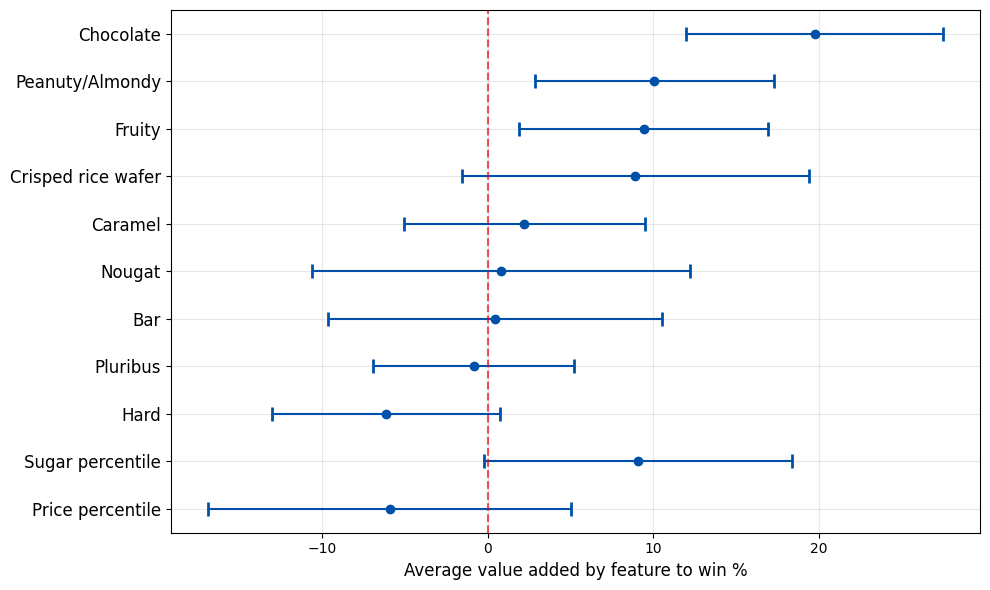

In [11]:
# coefplot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = range(len(coeffs))
ax.errorbar(
    coeffs.values,
    y_pos,
    xerr=[coeffs.values - conf_int.iloc[:, 0], conf_int.iloc[:, 1] - coeffs.values],
    fmt="o",
    capsize=5,
    capthick=2,
    color="#0050AA",
)
ax.axvline(x=0, color="#E60A14", linestyle="--", alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(coeffs.index, fontsize=12)
ax.set_xlabel("Average value added by feature to win %", fontsize=12)
# ax.set_title("Coefficient plot")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Diagnostics

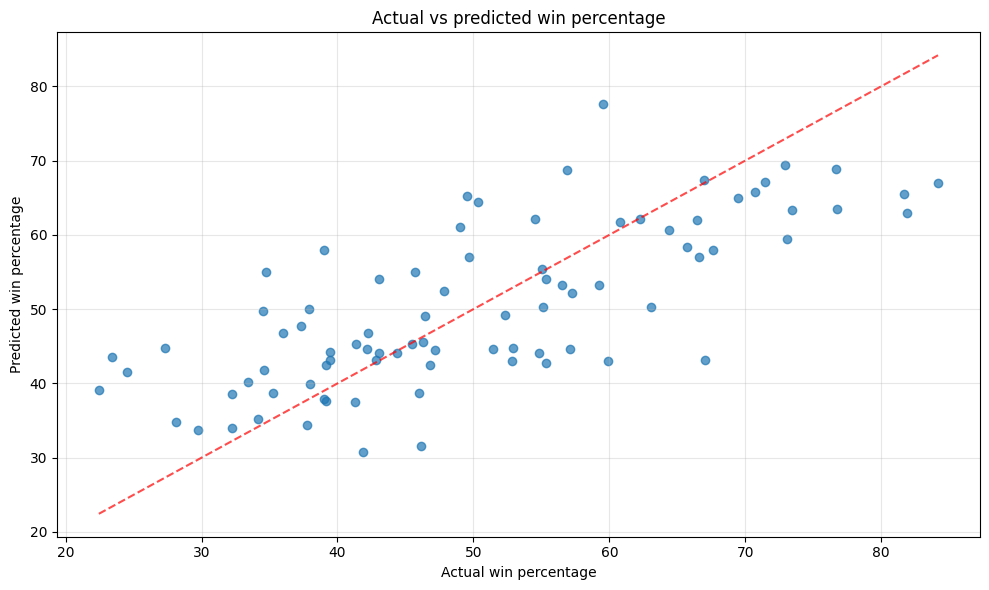

In [12]:
# actual vs predicted plot
fitted_values = model.predict(df.drop(columns=["competitorname", "winpercent"]))

plt.figure(figsize=(10, 6))
plt.scatter(
    df["winpercent"],
    fitted_values,
    alpha=0.7,
)
plt.plot(
    [df["winpercent"].min(), df["winpercent"].max()],
    [df["winpercent"].min(), df["winpercent"].max()],
    color="red",
    linestyle="--",
    alpha=0.7,
)
plt.xlabel("Actual win percentage")
plt.ylabel("Predicted win percentage")
plt.title("Actual vs predicted win percentage")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Residuals

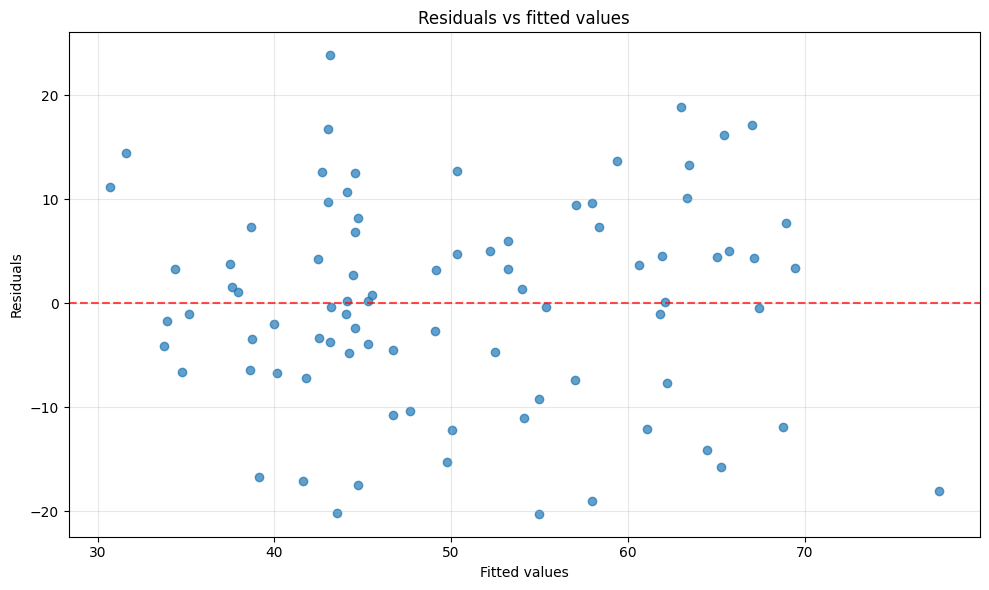

In [13]:
# residual vs fitted values plot
residuals = model.resid()
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted values")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

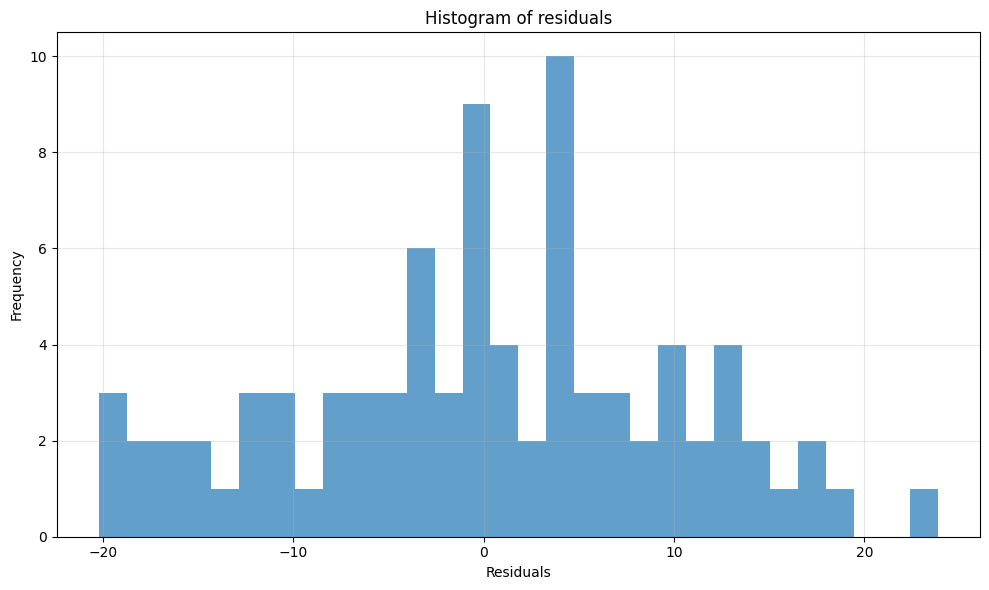

In [14]:
# residual histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print("Shapiro-Wilk test:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
# can't reject null hypothesis of normality (p > 0.05)

Shapiro-Wilk test:
Statistic: 0.9867, p-value: 0.5358


In [16]:
# Breusch-Pagan test

bp_corr, bp_p = stats.pearsonr(fitted_values, residuals**2)
print("Breusch-Pagan tes:")
print(f"Correlation: {bp_corr:.4f}, p-value: {bp_p:.4f}")
# no evidence of heteroscedasticity (p > 0.05)

Breusch-Pagan tes:
Correlation: 0.1596, p-value: 0.1446


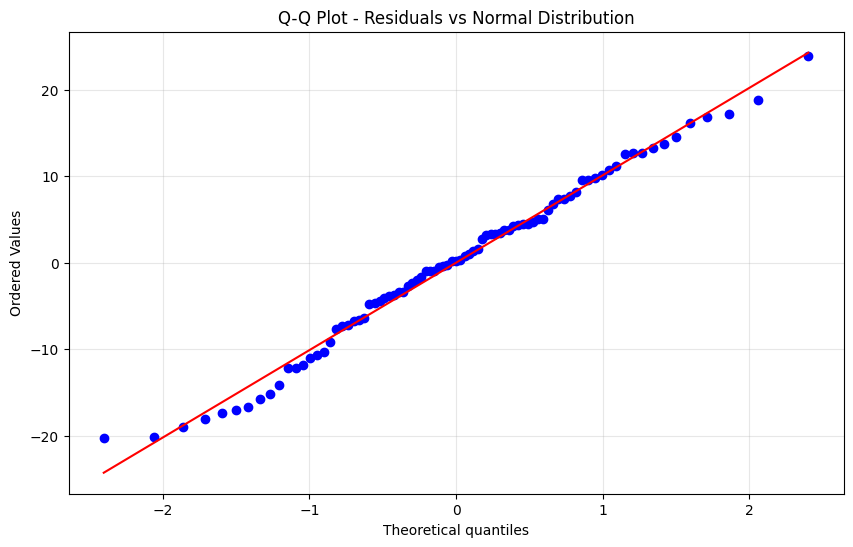

In [ ]:
# Q-Q plot for normality of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot - Residuals vs Normal Distribution")
plt.grid(True, alpha=0.3)
plt.show()